In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
data = pd.read_csv('/content/drive/MyDrive/multi_classification_train.csv')
data

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Class
0,1,-90.532634,-66.953472,79.261856,-111.800554,126.403549,111.509348,207.728953,-26.600556,-106.229324,...,148.391734,77.835738,-10.728207,1.100625,1.035362,-87.010809,-16.242297,-32.074925,-17.666026,1
1,2,-103.156720,-16.070400,87.819228,12.614599,51.347780,67.483725,40.269172,51.442254,-151.486693,...,29.009475,3.995786,-10.861630,-142.605726,-25.924592,-86.755351,-36.479749,-130.246619,-44.143652,2
2,3,24.326153,-92.098078,82.238354,-56.795879,85.203996,127.916504,-90.080307,-128.124071,18.036020,...,111.810098,65.826018,-101.271203,-44.127749,-7.131464,-105.049759,-130.948256,-43.113523,-37.330448,4
3,4,-64.631737,-83.703583,84.135072,-5.516152,74.338494,112.630556,181.576798,-1.054023,60.469865,...,50.047108,100.439101,-117.842955,150.239788,-144.635542,-144.306209,-69.272905,-79.629675,-51.334456,2
4,5,-55.473830,-78.853237,88.129107,75.200543,76.991520,60.224711,-13.106559,-146.773016,-33.490566,...,85.988282,23.381960,11.876102,-188.296503,-80.323929,-56.757987,-20.314172,-42.625170,-24.102753,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,47996,-87.108191,-60.144979,88.684810,126.370166,69.649250,246.690989,68.973573,194.720258,-28.112842,...,0.680698,99.344282,-40.468356,59.602514,-84.931182,-127.897922,-71.951492,-47.415895,-71.335712,2
47996,47997,-81.955836,25.992138,85.513476,104.466523,62.570018,21.866583,-26.799428,88.327511,-68.907977,...,41.719983,44.303451,-216.046063,42.327045,-137.935906,-43.356225,-73.312303,-49.577503,-63.625282,3
47997,47998,-37.122904,-0.885023,86.990027,144.566972,87.266122,74.681566,5.930300,7.880936,-176.209479,...,74.811260,121.307286,-42.375677,11.766851,-78.725390,-126.507350,-41.193191,-66.652097,-35.865562,1
47998,47999,-81.065847,43.829585,87.794248,253.747102,59.630668,84.944458,19.864267,74.145255,-180.354203,...,78.961755,130.106200,-116.635990,-33.445066,-41.137102,12.558330,-22.311973,-56.104864,-71.174979,3


In [36]:
data_arr=np.array(data)
X=data_arr[:,1:-1]
Y=data_arr[:,-1]
X.shape,Y.shape

((48000, 20), (48000,))

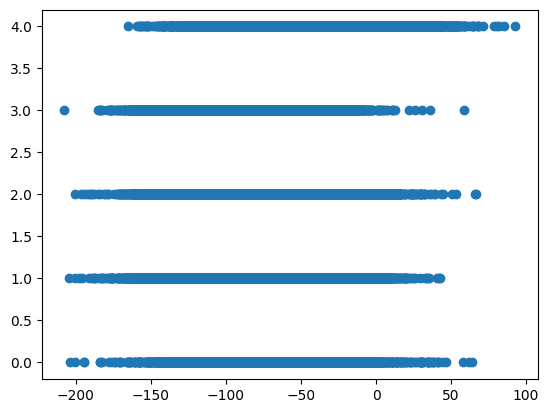

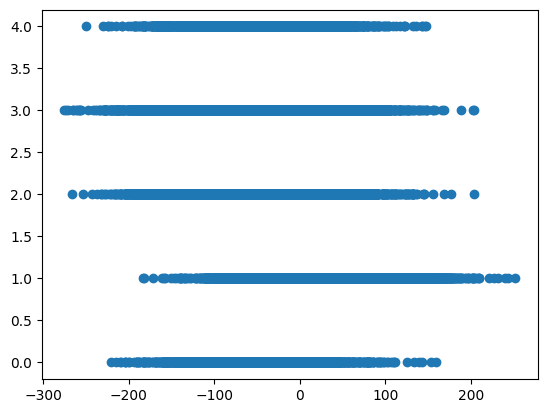

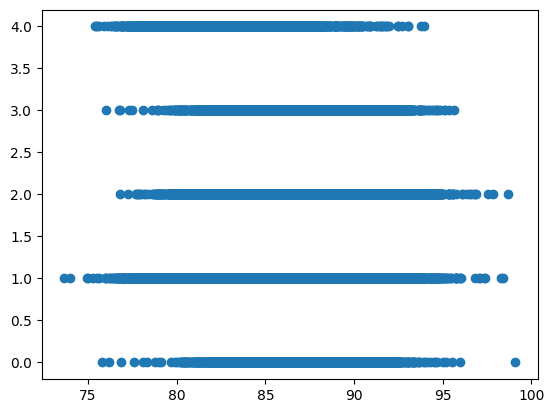

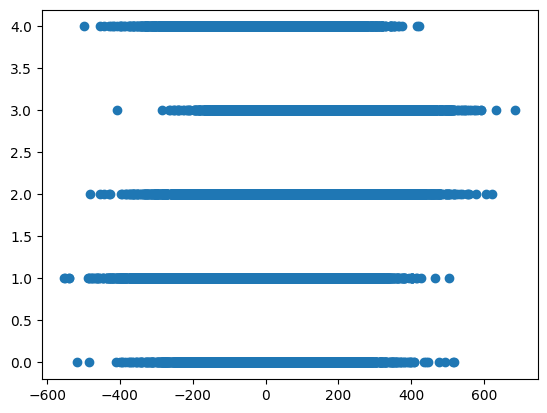

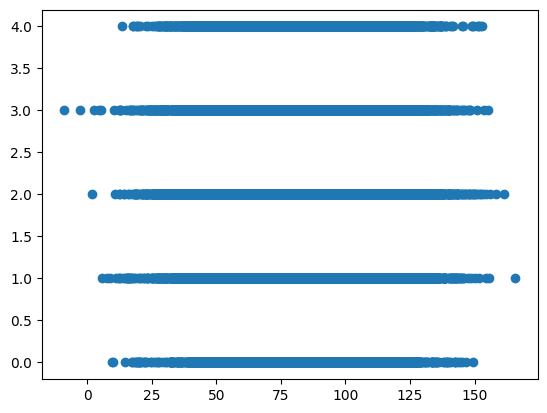

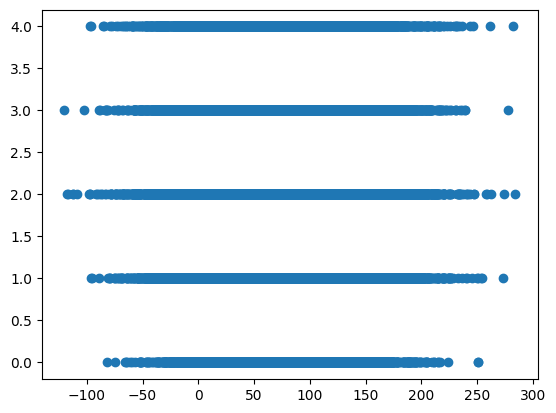

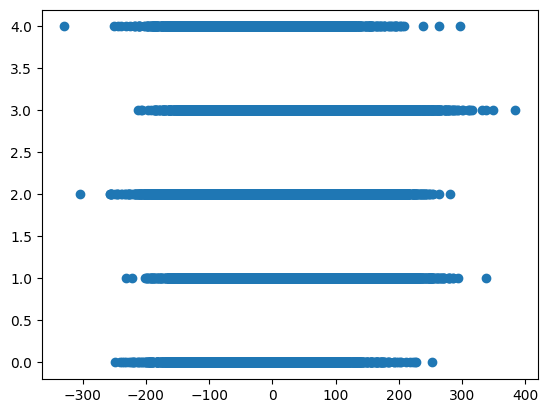

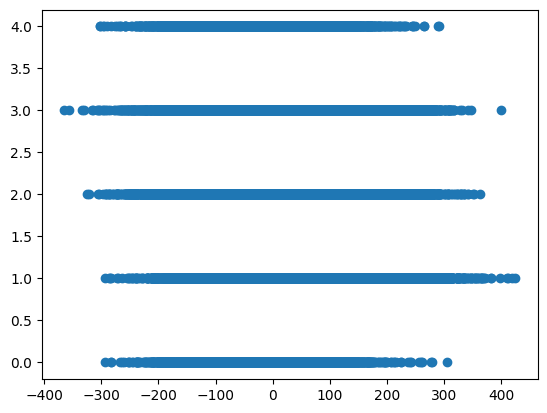

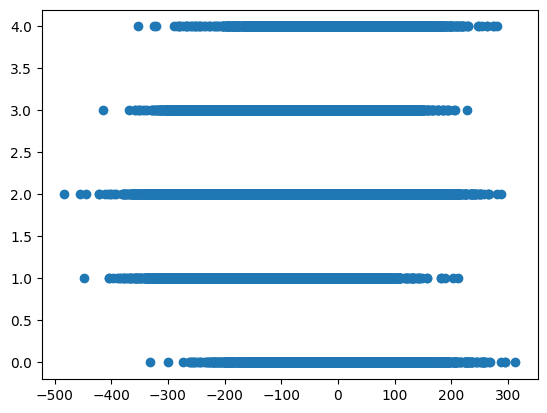

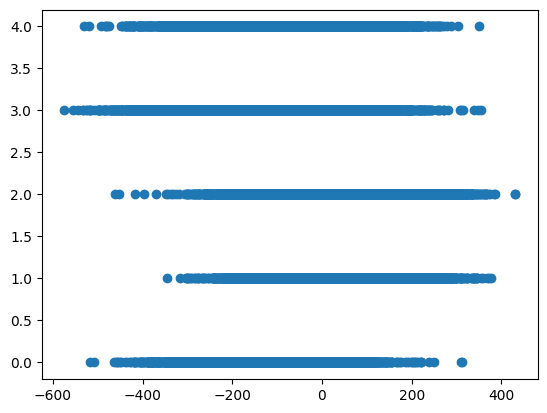

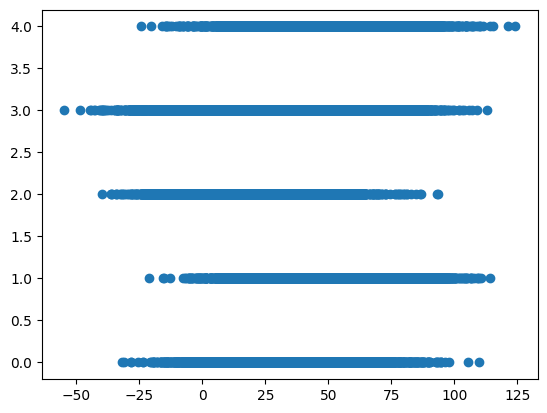

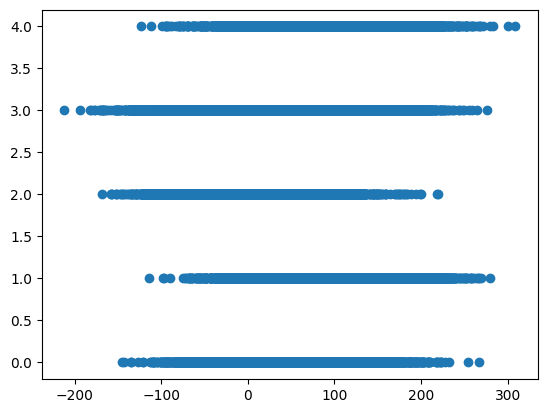

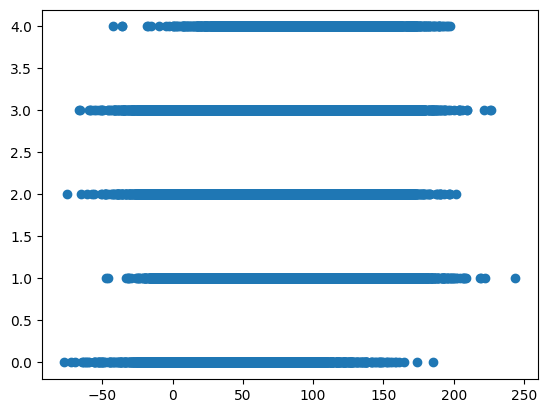

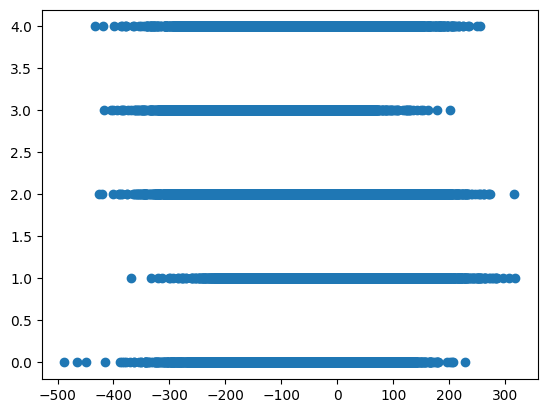

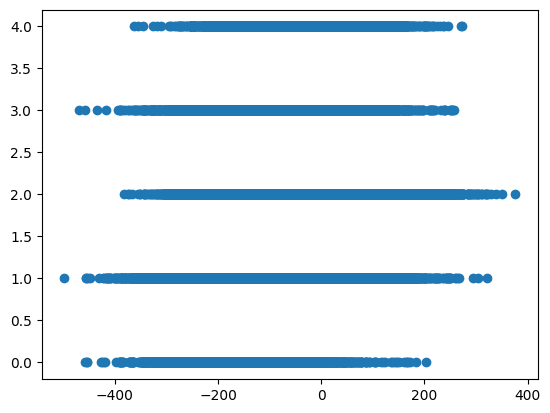

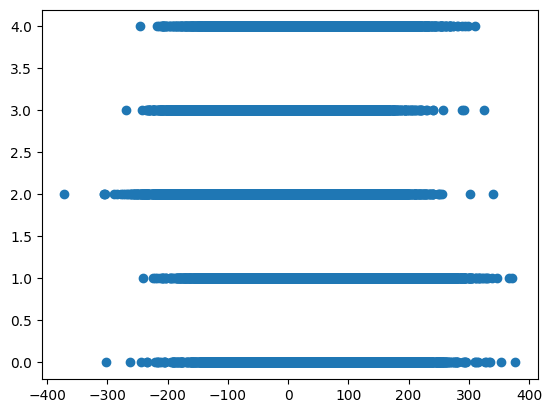

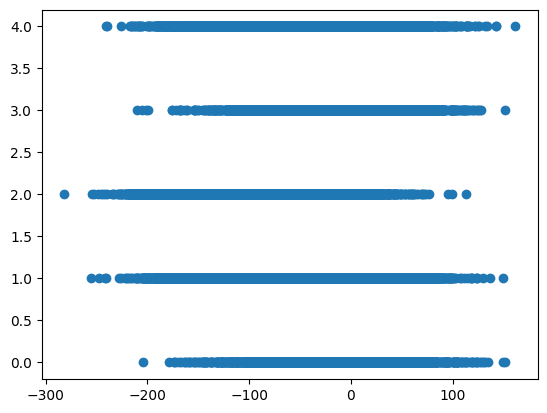

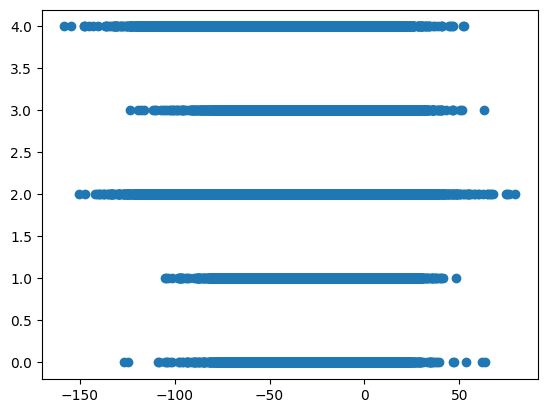

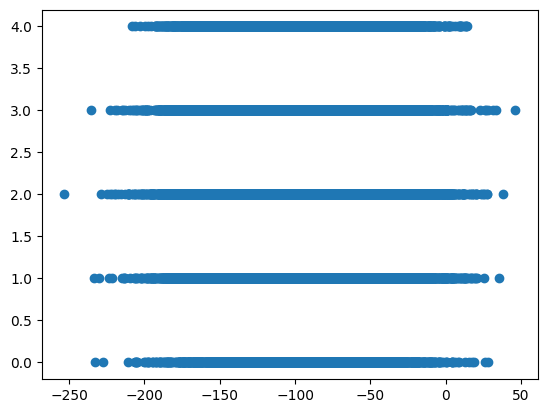

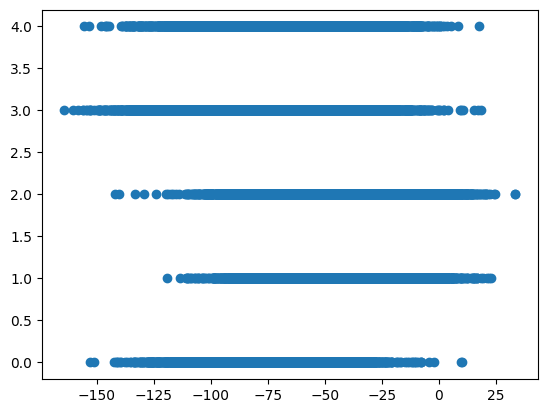

In [37]:
for i in range(X.shape[1]):
   plt.scatter(X[:,i],Y)
   plt.show()

In [38]:
Y_enc = (np.arange(np.max(Y)+1)==Y[:,None]).astype(float)
Y_enc

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [39]:
W = np.random.randn(20,5)
b = np.zeros(5)
b

array([0., 0., 0., 0., 0.])

In [40]:
mu     = np.mean(X,axis=0)
sigma  = np.std(X,axis=0)
X_mean = (X - mu)
X_norm = (X - mu)/sigma


In [41]:
def input(X,W,b):
  return np.dot(X,W)+b
net_input = input(X_norm,W,b)
print(net_input)

[[  1.46156991  -3.03235183   0.63166573 -11.07473916  -0.97025093]
 [ -2.25980292   2.08121083  -2.95472239   0.52456564  -1.92316812]
 [  5.05119867  -4.53592615  14.59658684  -8.01532706  -3.10901617]
 ...
 [ -2.70284912  -0.48740257   3.86175212  -3.57276047  -1.29259215]
 [ -3.76103356   2.42000559  -3.87016946   5.1674709   -3.86795859]
 [ -4.62854728  -1.00523235   0.1216337    2.15942632  -1.87285884]]


In [42]:
def softmax(z):
  return (np.exp(z.T)/np.sum(np.exp(z), axis =1)).T

smax = softmax(net_input)
print(smax)

[[6.51402964e-01 7.28055214e-03 2.84071015e-01 2.34099172e-06
  5.72431280e-02]
 [1.04303266e-02 8.00896183e-01 5.20592869e-03 1.68862730e-01
  1.46048312e-02]
 [7.15252711e-05 4.90709097e-09 9.99928449e-01 1.51265363e-10
  2.04419932e-08]
 ...
 [1.38081418e-03 1.26558538e-02 9.79727580e-01 5.78545527e-04
  5.65720685e-03]
 [1.24528907e-04 6.02089947e-02 1.11653685e-04 9.39442922e-01
  1.11900810e-04]
 [9.46151934e-04 3.54443131e-02 1.09380088e-01 8.39344710e-01
  1.48847370e-02]]


In [43]:
def class_label(z):
  return z.argmax(axis=1)
print(class_label(smax))

[0 1 2 ... 2 3 3]


In [44]:
def cross_entropy(output, y_target):
  return -np.sum(np.log(output) * (y_target), axis = 1)
xent = cross_entropy(smax,Y_enc)
xent

array([ 4.92254858,  5.25795717, 17.70567456, ...,  4.36963542,
        0.06246822,  2.21292642])

In [45]:
def cost(output, y_target):
  return np.mean(cross_entropy(output,y_target))
J_cost = cost (smax,Y_enc)
J_cost

4.193200754006013

In [46]:
m,n = X.shape

In [47]:
def gradient_descent(X, y, w_init, b_init, learning_rate , iteration,lambda_):


    cost_list = []

    for i in range(iteration):

        z = np.dot(X, w_init) + b_init
        f_wb = softmax(z)
        cost = -(1 / m) * np.sum(y * np.log(f_wb))+(lambda_/(2*m))*np.sum(w_init**2)
        cost_list.append(cost)

        d_w = (1 / m) * np.dot(X.T, (f_wb - y)) + (1/m)*lambda_*w_init
        d_b = (1 / m) * np.sum((f_wb - y))


        w_init = w_init - learning_rate * d_w
        b_init = b_init - learning_rate * d_b


        if(i%(iteration/10)==0):
            print("Cost is :", cost)


    return w_init, b_init, cost_list

In [48]:
iterations = 1000
lambda_0 = 0.1
w_init, b_init, cost_list = gradient_descent(X_norm,Y_enc,W,b,0.4,iteration= iterations,lambda_= lambda_0)

Cost is : 4.193313803329133
Cost is : 0.5779653285712941
Cost is : 0.5489208227417475
Cost is : 0.5457768761909878
Cost is : 0.5452922700298218
Cost is : 0.5451958839499075
Cost is : 0.5451738743400524
Cost is : 0.5451685064070259
Cost is : 0.54516715228839
Cost is : 0.5451668008503489


In [49]:
out = input(X_norm,w_init,b_init)
sout = softmax(out)
p = (class_label(sout))
print(p)

[1 2 4 ... 2 3 2]


In [50]:
def plot(cost,i_list):
    plt.plot(i_list,cost,c="r",label="cost")
    plt.xlabel(f"iteration")
    plt.ylabel("cost")
    plt.legend()
    plt.show()

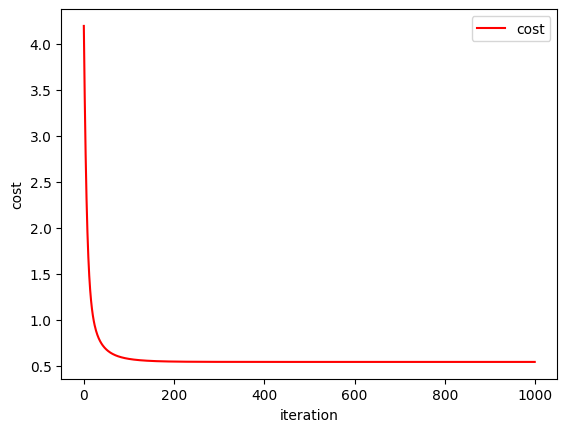

In [52]:
plot(cost_list,np.arange(iterations))

In [53]:
print('Train Accuracy:', {np.mean(p == Y) * 100})

Train Accuracy: {82.64583333333333}


Confusion Matrix:
[[ 2315   199   198   768   560]
 [   57 10391   627    77   252]
 [  200   747 14371   894   406]
 [  403   361   885  8188   227]
 [  150   462   323   534  4405]]
F1 Scores for each class: [0.64619679 0.88193855 0.87038944 0.79785627 0.75145002]
Macro F1 Score: 0.79
Micro F1 Score: 0.83
Weighted F1 Score: 0.82


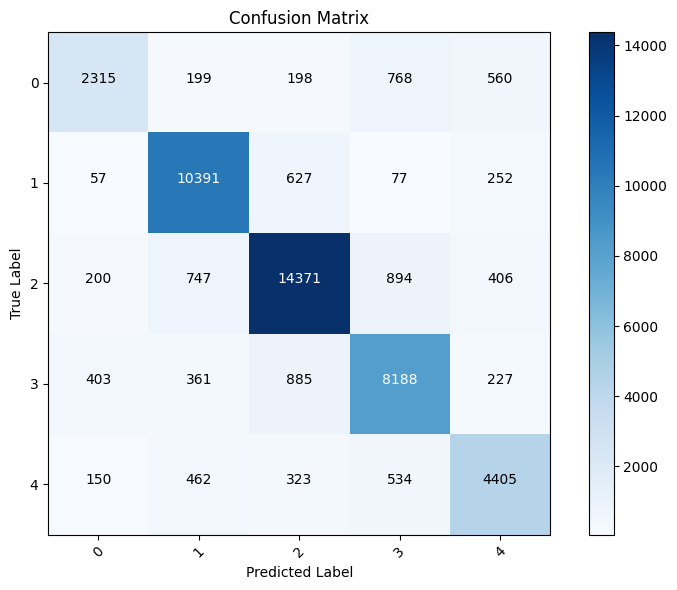

In [54]:
Y = np.array(Y).astype(int)
p = np.array(p).astype(int)


num_classes = len(np.unique(Y))
confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
np.add.at(confusion_matrix, (Y, p), 1)

# Step 2: Calculate precision, recall, and F1 score for each class
tp = np.diag(confusion_matrix)  # True positives: diagonal of the confusion matrix
fp = np.sum(confusion_matrix, axis=0) - tp  # False positives: column sum - diagonal
fn = np.sum(confusion_matrix, axis=1) - tp  # False negatives: row sum - diagonal
support = np.sum(confusion_matrix, axis=1)  # Total true samples per class

# Precision, Recall, and F1 Scores
precision = np.divide(tp, (tp + fp), out=np.zeros_like(tp, dtype=float), where=(tp + fp) > 0)
recall = np.divide(tp, (tp + fn), out=np.zeros_like(tp, dtype=float), where=(tp + fn) > 0)
f1_scores = np.divide(2 * precision * recall, (precision + recall), out=np.zeros_like(tp, dtype=float), where=(precision + recall) > 0)

# Step 3: Calculate Macro, Micro, and Weighted F1 Scores
f1_macro = np.mean(f1_scores)

tp_micro = np.sum(tp)  # Sum of all true positives
fp_micro = np.sum(fp)  # Sum of all false positives
fn_micro = np.sum(fn)  # Sum of all false negatives
precision_micro = tp_micro / (tp_micro + fp_micro)
recall_micro = tp_micro / (tp_micro + fn_micro)
f1_micro = 2 * precision_micro * recall_micro / (precision_micro + recall_micro)

weights = support / np.sum(support)
f1_weighted = np.sum(f1_scores * weights)

# Print results
print("Confusion Matrix:")
print(confusion_matrix)
print(f"F1 Scores for each class: {f1_scores}")
print(f"Macro F1 Score: {f1_macro:.2f}")
print(f"Micro F1 Score: {f1_micro:.2f}")
print(f"Weighted F1 Score: {f1_weighted:.2f}")

# Step 4: Plot the confusion matrix
def plot_confusion_matrix(cm, class_labels):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)

    # Add numbers to the cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > cm.max() / 2 else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Class labels (assumed as 0, 1, 2 for this example)
class_labels = [str(i) for i in range(num_classes)]
plot_confusion_matrix(confusion_matrix, class_labels)

In [55]:
test = pd.read_csv('/content/drive/MyDrive/multi_classification_test.csv')
test

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20
0,1,-53.837350,-32.645889,88.656704,68.460038,77.278980,170.299440,-40.452999,157.171382,81.019740,...,45.212220,79.052230,23.209321,-300.397141,-26.927269,-7.724388,-47.897697,-31.844784,-80.670098,-68.257050
1,2,-72.698043,137.186526,85.122064,-135.777642,72.743374,37.159495,1.219229,86.447392,-29.006295,...,41.602345,68.546653,103.288778,0.742860,31.342856,37.431942,-92.965704,-22.113709,-57.311455,-74.076167
2,3,-87.376758,52.292029,82.285036,-103.899819,76.276041,22.141478,131.322204,69.009157,-121.703035,...,50.667553,94.928521,60.908583,-30.925963,-119.456062,170.920590,-8.940891,-49.424624,-76.538002,-35.694483
3,4,-114.053308,-82.064113,87.352300,311.645082,80.806755,158.822556,-74.591773,254.856750,-279.480145,...,63.089374,131.078916,13.590238,3.596146,-220.548262,-77.689231,21.423893,-64.062843,-69.416930,-12.109111
4,5,-129.305845,-70.794135,87.318648,-39.995258,91.126015,96.496800,0.578289,-101.344881,17.968593,...,-3.900131,-63.876158,27.123655,43.230208,-76.974733,-91.008909,-91.917865,1.852507,-88.130343,-103.909397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,-21.235812,10.162324,76.467414,-164.825244,53.720869,105.076025,-54.125934,-127.335112,-23.196563,...,46.507036,82.820445,112.704341,-61.935406,82.203066,42.844979,-108.218241,-48.056829,-44.294051,-32.294493
11996,11997,-73.270409,-98.359250,87.000504,136.970087,99.026061,36.217097,26.300064,184.720794,-104.449244,...,57.254313,114.097526,47.629415,-88.903451,-109.001067,5.534633,-49.176499,-60.416611,-63.984891,-39.427326
11997,11998,-68.193466,-29.417326,89.778859,328.552297,104.236206,146.835372,-10.168784,-3.996974,-263.638639,...,50.461897,94.330014,154.349170,16.820369,-88.123112,-92.364591,-32.774588,-9.409129,-108.549062,-73.006288
11998,11999,-106.533738,-99.189080,82.971417,-160.564333,114.170497,167.043080,126.809174,-110.905903,157.168442,...,36.134397,52.633650,88.309681,29.442673,-75.201271,71.566806,6.882100,-31.478725,-109.739421,-127.291083


In [56]:
test_arr = np.array(test)
X_test = test_arr[:,1:]
X_test

array([[ -53.83734971,  -32.6458895 ,   88.65670437, ...,  -31.84478415,
         -80.67009828,  -68.25705001],
       [ -72.69804275,  137.18652565,   85.12206387, ...,  -22.11370932,
         -57.31145453,  -74.07616736],
       [ -87.37675817,   52.29202943,   82.28503619, ...,  -49.4246242 ,
         -76.5380021 ,  -35.69448307],
       ...,
       [ -68.19346585,  -29.41732628,   89.77885938, ...,   -9.40912862,
        -108.54906248,  -73.00628847],
       [-106.53373787,  -99.18908011,   82.97141713, ...,  -31.47872486,
        -109.73942126, -127.29108315],
       [ -88.03119387,  -21.02195308,   83.67580673, ...,  -26.31964756,
         -84.08287989,  -30.13499549]])

In [57]:
w_init

array([[-0.29343955, -0.15105648,  1.09596079,  0.16549417,  0.62052881],
       [ 0.19012058,  1.27609847, -0.53832208, -0.10192778, -1.02914349],
       [ 0.8579449 ,  1.25187761,  1.77452006,  1.20197661,  0.93408662],
       [ 0.37809058, -1.24421324, -1.41722882, -0.1008714 , -1.57673093],
       [-0.18367661, -0.15021489, -0.17323703, -0.16315056, -0.15010981],
       [-0.09880969, -0.12770875, -0.10926825, -0.12247645, -0.11850239],
       [ 0.10229594,  0.42212338,  0.65742187,  1.20927677, -0.22714757],
       [-2.02634685, -0.93471323, -0.94318433, -0.74360959, -1.83877088],
       [ 2.15296074, -0.0754436 ,  0.43628316,  0.76957874,  1.08030541],
       [ 0.25440086,  1.28635045,  1.39202707, -0.69939018,  0.26412741],
       [-0.55833085, -0.03903025, -1.1950108 ,  0.64230848, -0.47444553],
       [-0.44753693,  0.33519917, -2.37341708, -1.66908297, -0.20155907],
       [ 0.51324709,  0.19857631, -0.44135732,  0.26125533,  1.14672617],
       [ 0.56628054,  1.05059268, -0.2

In [58]:
b_init

array([-4.08932147e-18, -4.08932147e-18, -4.08932147e-18, -4.08932147e-18,
       -4.08932147e-18])

In [ ]:
mu_test     = np.mean(X_test,axis=0)
sigma_test  = np.std(X_test,axis=0)
X_mean_test = (X_test - mu_test)
X_norm_test = (X_test - mu_test)/sigma_test
X_norm_test

In [ ]:
out = input(X_norm_test,w_init,b_init)
sout = softmax(out)
p = (class_label(sout))
print(p)